# Import Lib and Dataset and Config

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
url = "../iris.data"
columns_iris = ["sepal length", "sepal width", "petal length", "petal width", "class"]

dataset = pd.read_csv(url, names=columns_iris, sep=',', na_values='?', skipinitialspace =True)

In [8]:
p_color = '#e9c7c6'
s_color = '#4c4b49'
t_color = '#4c4b49'

In [9]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues, fileName='confusion_matrix.png'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20, 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.gca().set_facecolor('none')  # ทำให้พื้นหลังโปร่งใส
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)

    plt.savefig(fileName + '.png', transparent=True)
    plt.show()


# Basic information and statistics of Iris dataset

## Sepal Length

+-----------+---------+
|           |   Value |
+===========+=========+
| Skewness: |  0.3149 |
+-----------+---------+
| Mean:     |  5.8433 |
+-----------+---------+
| Median:   |  5.8    |
+-----------+---------+
| Mode:     |  5      |
+-----------+---------+
| SD:       |  0.8281 |
+-----------+---------+
| Variance: |  0.6857 |
+-----------+---------+
| Min:      |  4.3    |
+-----------+---------+
| Q₁:       |  5.1    |
+-----------+---------+
| Q₂:       |  5.8    |
+-----------+---------+
| Q₃:       |  6.4    |
+-----------+---------+
| Max:      |  7.9    |
+-----------+---------+


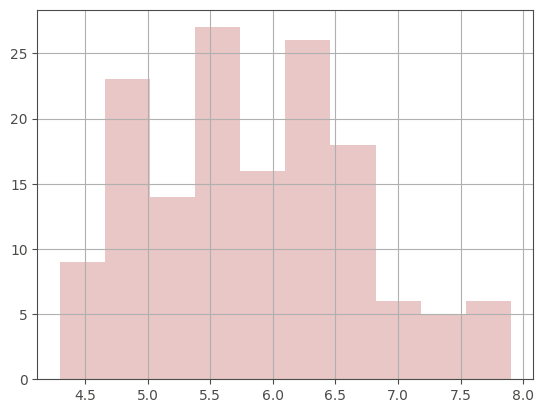

In [10]:
result = dataset['sepal length']

# Todo: Show Parameters
table = []

table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))

# Todo: Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
plt.show()

## Sepal Width

+-----------+---------+
|           |   Value |
+===========+=========+
| Skewness: |  0.3341 |
+-----------+---------+
| Mean:     |  3.054  |
+-----------+---------+
| Median:   |  3      |
+-----------+---------+
| Mode:     |  3      |
+-----------+---------+
| SD:       |  0.4336 |
+-----------+---------+
| Variance: |  0.188  |
+-----------+---------+
| Min:      |  2      |
+-----------+---------+
| Q₁:       |  2.8    |
+-----------+---------+
| Q₂:       |  3      |
+-----------+---------+
| Q₃:       |  3.3    |
+-----------+---------+
| Max:      |  4.4    |
+-----------+---------+


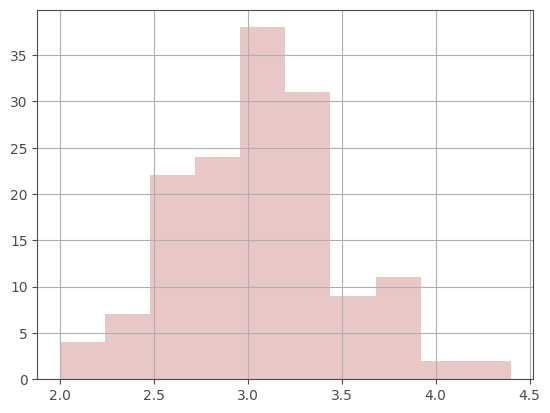

In [11]:
result = dataset['sepal width']

# Todo: Show Parameters
table = []

table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))

# Todo: Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
plt.show()

## Petal Length

+-----------+---------+
|           |   Value |
+===========+=========+
| Skewness: | -0.2745 |
+-----------+---------+
| Mean:     |  3.7587 |
+-----------+---------+
| Median:   |  4.35   |
+-----------+---------+
| Mode:     |  1.5    |
+-----------+---------+
| SD:       |  1.7644 |
+-----------+---------+
| Variance: |  3.1132 |
+-----------+---------+
| Min:      |  1      |
+-----------+---------+
| Q₁:       |  1.6    |
+-----------+---------+
| Q₂:       |  4.35   |
+-----------+---------+
| Q₃:       |  5.1    |
+-----------+---------+
| Max:      |  6.9    |
+-----------+---------+


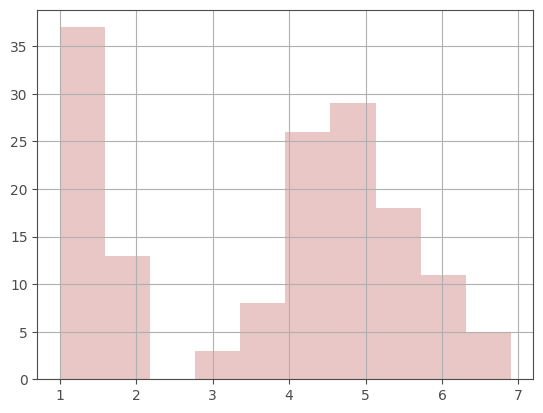

In [12]:
result = dataset['petal length']

# Todo: Show Parameters
table = []

table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))

# Todo: Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
plt.show()

## Petal Width

+-----------+---------+
|           |   Value |
+===========+=========+
| Skewness: | -0.105  |
+-----------+---------+
| Mean:     |  1.1987 |
+-----------+---------+
| Median:   |  1.3    |
+-----------+---------+
| Mode:     |  0.2    |
+-----------+---------+
| SD:       |  0.7632 |
+-----------+---------+
| Variance: |  0.5824 |
+-----------+---------+
| Min:      |  0.1    |
+-----------+---------+
| Q₁:       |  0.3    |
+-----------+---------+
| Q₂:       |  1.3    |
+-----------+---------+
| Q₃:       |  1.8    |
+-----------+---------+
| Max:      |  2.5    |
+-----------+---------+


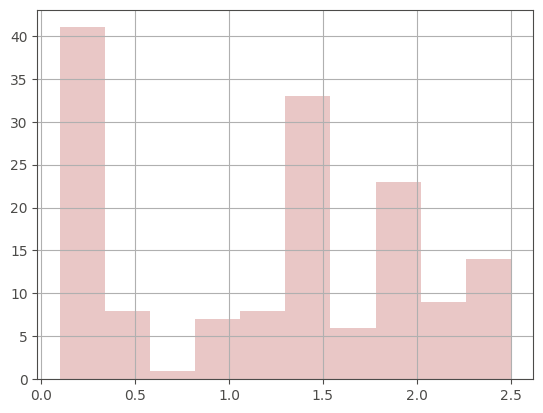

In [13]:
result = dataset['petal width']

# Todo: Show Parameters
table = []

table.append(['Skewness: ', f"{result.skew():,.4f}"])
table.append(['Mean: ', f"{result.mean():,.4f}"])
table.append(['Median: ', f"{result.median():,.4f}"])
table.append(['Mode: ', f"{result.mode().iloc[0]:,}"])
table.append(['SD: ', f"{result.std():,.4f}"])
table.append(['Variance: ', f"{result.var():,.4f}"])
table.append(['Min: ', f"{result.min():,}"])
table.append(['Q₁: ', f"{result.quantile(.25):,.4f}"])
table.append(['Q₂: ', f"{result.quantile(.50):,.4f}"])
table.append(['Q₃: ', f"{result.quantile(.75):,.4f}"])
table.append(['Max: ', f"{result.max():,}"])

print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))

# Todo: Show Histogram
result.hist(bins=10, color=p_color).set_facecolor("none")

ax = plt.gca()
ax.spines['top'].set_color(s_color)
ax.spines['right'].set_color(s_color)
ax.spines['left'].set_color(s_color)
ax.spines['bottom'].set_color(s_color)
ax.tick_params(axis='both', colors=t_color)

plt.gcf().set_facecolor("none")
plt.show()

## Class

In [14]:
print(dataset['class'].describe())
print(dataset['class'].value_counts())

count             150
unique              3
top       Iris-setosa
freq               50
Name: class, dtype: object
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# K Nearest Neibours (KNN) Classifier

## weights: uniform | 80:20

### Spilt Train and test Data

In [72]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3302)

In [73]:
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

unique, counts = np.unique(y_test, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

{'Iris-setosa': np.int64(41), 'Iris-versicolor': np.int64(38), 'Iris-virginica': np.int64(41)}
{'Iris-setosa': np.int64(9), 'Iris-versicolor': np.int64(12), 'Iris-virginica': np.int64(9)}


((120, 4), (30, 4), (120,), (30,))

### Pre Process

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train Model

In [18]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Classifier performance evaluation

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
comparison_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(tabulate(comparison_table, headers='keys', tablefmt='grid'))

+----+-----------------+-----------------+
|    | Actual          | Predicted       |
+====+=================+=================+
|  0 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  1 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  2 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  3 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  4 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  5 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  6 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  7 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  8 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  9 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
| 10 | Iris

### Evaluation

Confusion matrix, without normalization


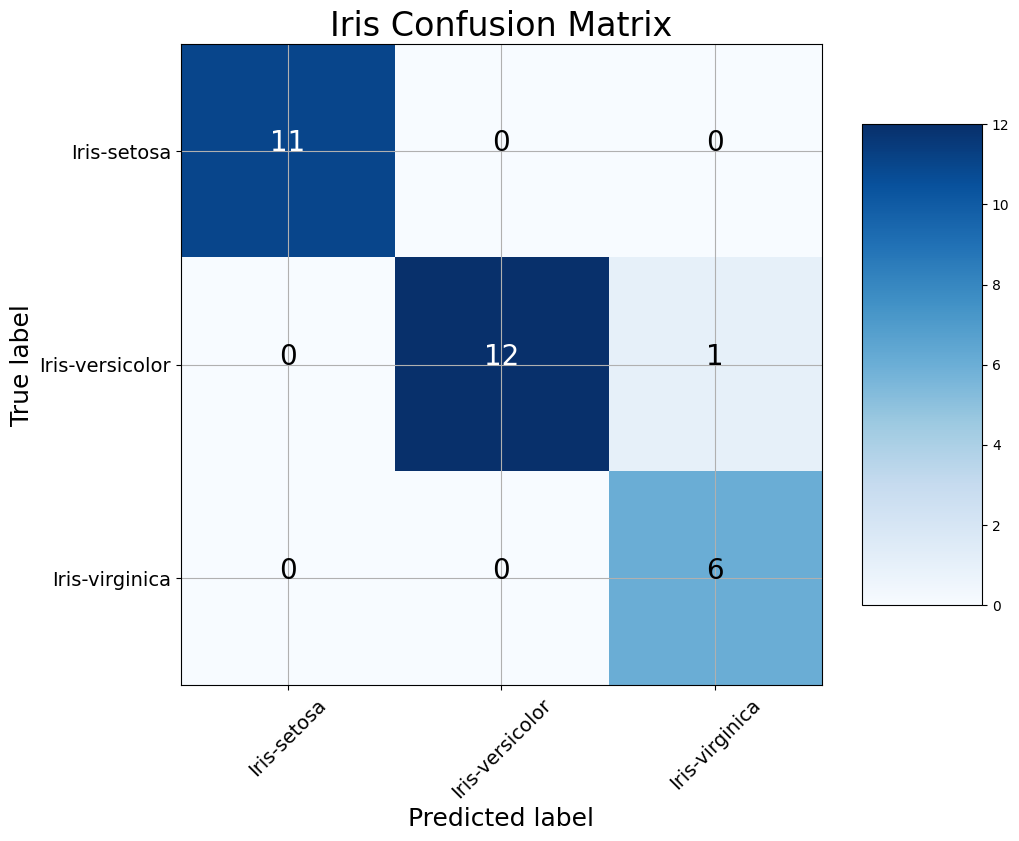

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], title = 'Iris Confusion Matrix', fileName='uniform_80_20')

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


## weights: uniform | 70:30

### Spilt Train and test Data

In [23]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [24]:
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

unique, counts = np.unique(y_test, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

{'Iris-setosa': np.int64(35), 'Iris-versicolor': np.int64(32), 'Iris-virginica': np.int64(38)}
{'Iris-setosa': np.int64(15), 'Iris-versicolor': np.int64(18), 'Iris-virginica': np.int64(12)}


((105, 4), (45, 4), (105,), (45,))

### Pre Process

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train Model

In [26]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Classifier performance evaluation

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
comparison_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(tabulate(comparison_table, headers='keys', tablefmt='grid'))

+----+-----------------+-----------------+
|    | Actual          | Predicted       |
+====+=================+=================+
|  0 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  1 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  2 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  3 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  4 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  5 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  6 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  7 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  8 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  9 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
| 10 | Iris

### Evaluation

Confusion matrix, without normalization


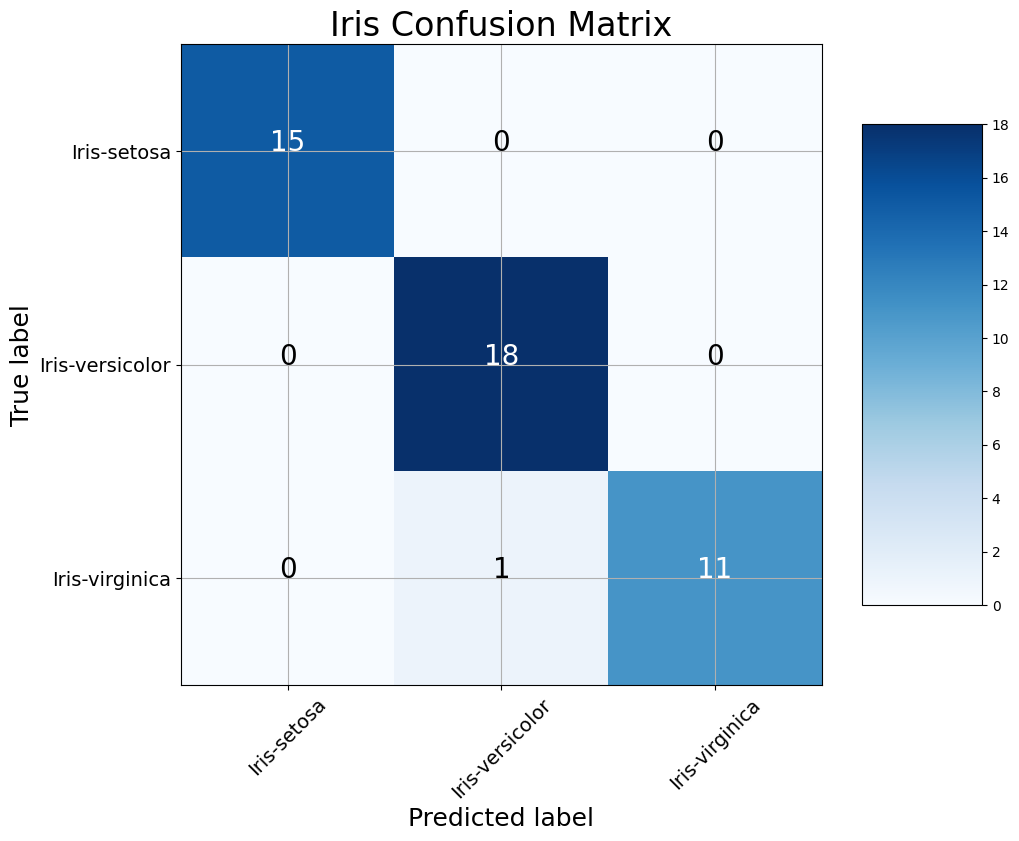

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], title = 'Iris Confusion Matrix', fileName='uniform_70_30')

In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.78%


## weights: uniform | 60:40

### Spilt Train and test Data

In [31]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [32]:
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

unique, counts = np.unique(y_test, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

{'Iris-setosa': np.int64(32), 'Iris-versicolor': np.int64(25), 'Iris-virginica': np.int64(33)}
{'Iris-setosa': np.int64(18), 'Iris-versicolor': np.int64(25), 'Iris-virginica': np.int64(17)}


((90, 4), (60, 4), (90,), (60,))

### Pre Process

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train Model

In [34]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Classifier performance evaluation

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
comparison_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(tabulate(comparison_table, headers='keys', tablefmt='grid'))

+----+-----------------+-----------------+
|    | Actual          | Predicted       |
+====+=================+=================+
|  0 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  1 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  2 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  3 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  4 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  5 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  6 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  7 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  8 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  9 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
| 10 | Iris

### Evaluation

Confusion matrix, without normalization


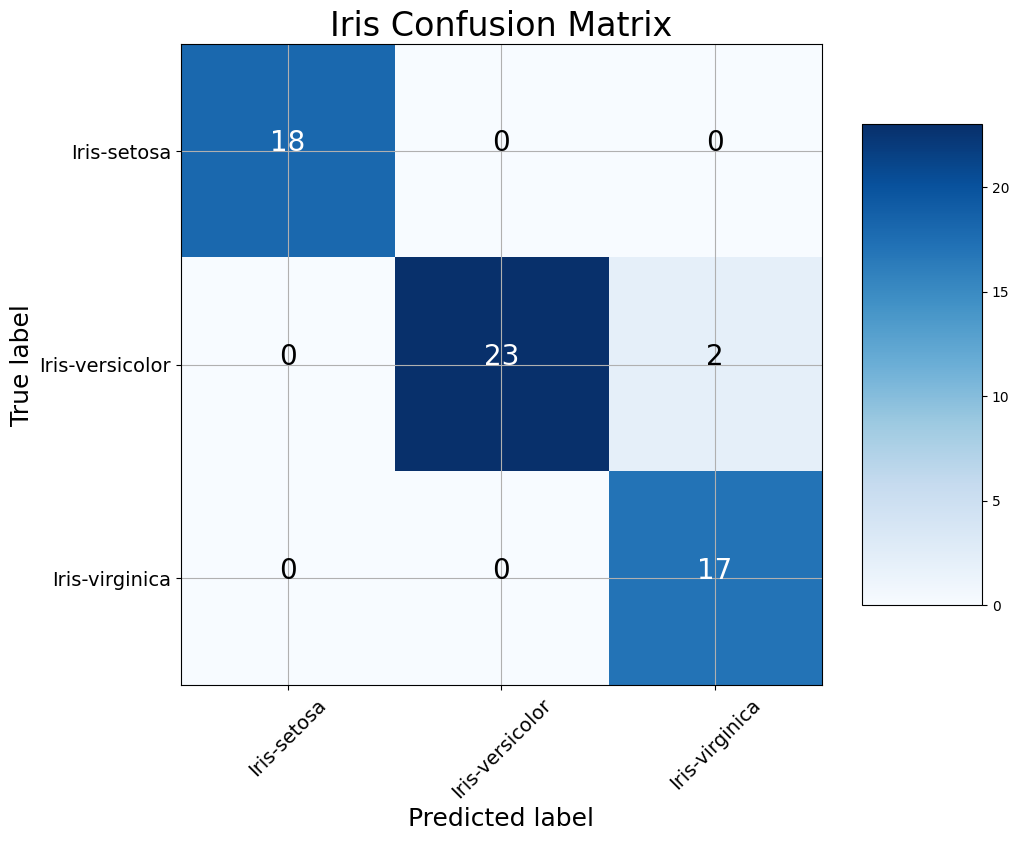

In [37]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], title = 'Iris Confusion Matrix', fileName='uniform_60_40')

In [38]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


## weights: distance | 80:20

### Spilt Train and test Data

In [78]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

unique, counts = np.unique(y_test, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

{'Iris-setosa': np.int64(40), 'Iris-versicolor': np.int64(40), 'Iris-virginica': np.int64(40)}
{'Iris-setosa': np.int64(10), 'Iris-versicolor': np.int64(10), 'Iris-virginica': np.int64(10)}


((120, 4), (30, 4), (120,), (30,))

{'Iris-setosa': np.int64(42), 'Iris-versicolor': np.int64(39), 'Iris-virginica': np.int64(39)}
{'Iris-setosa': np.int64(8), 'Iris-versicolor': np.int64(11), 'Iris-virginica': np.int64(11)}


((120, 4), (30, 4), (120,), (30,))

### Pre Process

In [41]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train Model

In [42]:
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

### Classifier performance evaluation

In [43]:
y_pred = classifier.predict(X_test)

In [44]:
comparison_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(tabulate(comparison_table, headers='keys', tablefmt='grid'))

+----+-----------------+-----------------+
|    | Actual          | Predicted       |
+====+=================+=================+
|  0 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  1 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  2 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  3 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  4 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  5 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  6 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  7 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  8 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  9 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
| 10 | Iris

### Evaluation

Confusion matrix, without normalization


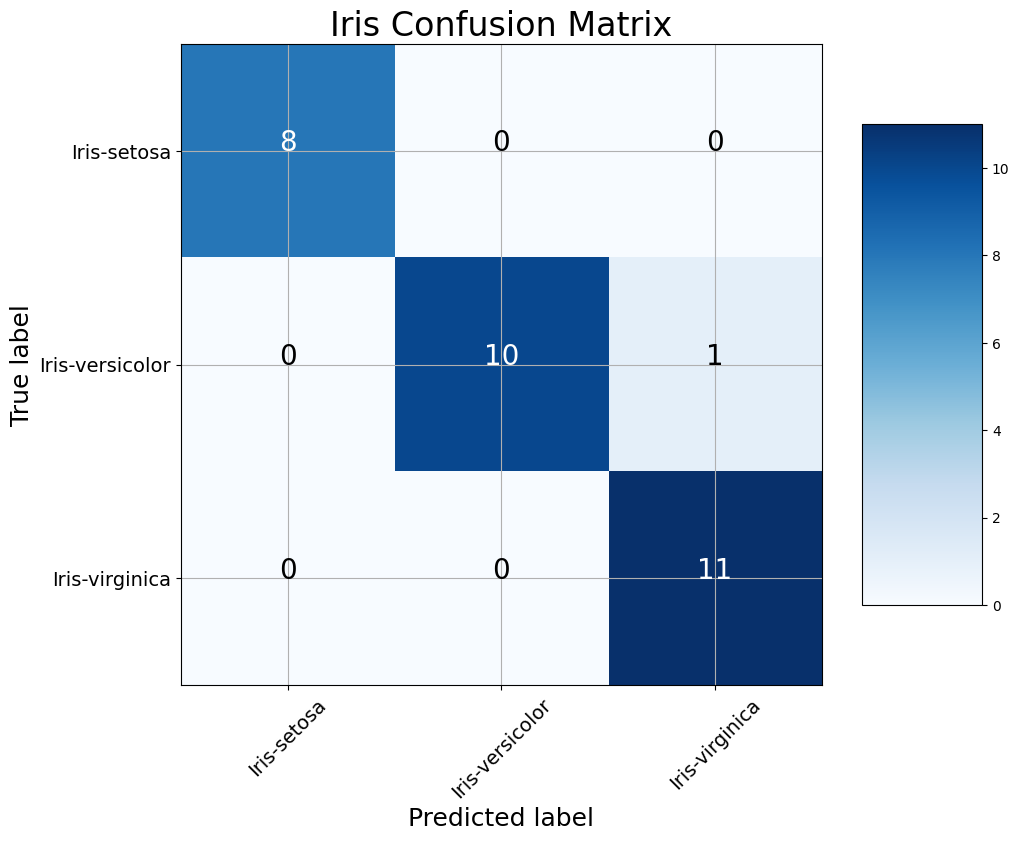

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], title = 'Iris Confusion Matrix', fileName='distance_80_20')

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


## weights: distance | 70:30

### Spilt Train and test Data

In [47]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [48]:
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

unique, counts = np.unique(y_test, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

{'Iris-setosa': np.int64(33), 'Iris-versicolor': np.int64(38), 'Iris-virginica': np.int64(34)}
{'Iris-setosa': np.int64(17), 'Iris-versicolor': np.int64(12), 'Iris-virginica': np.int64(16)}


((105, 4), (45, 4), (105,), (45,))

### Pre Process

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train Model

In [50]:
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

### Classifier performance evaluation

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
comparison_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(tabulate(comparison_table, headers='keys', tablefmt='grid'))

+----+-----------------+-----------------+
|    | Actual          | Predicted       |
+====+=================+=================+
|  0 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  1 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  2 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  3 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  4 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  5 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  6 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  7 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  8 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  9 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
| 10 | Iris

### Evaluation

Confusion matrix, without normalization


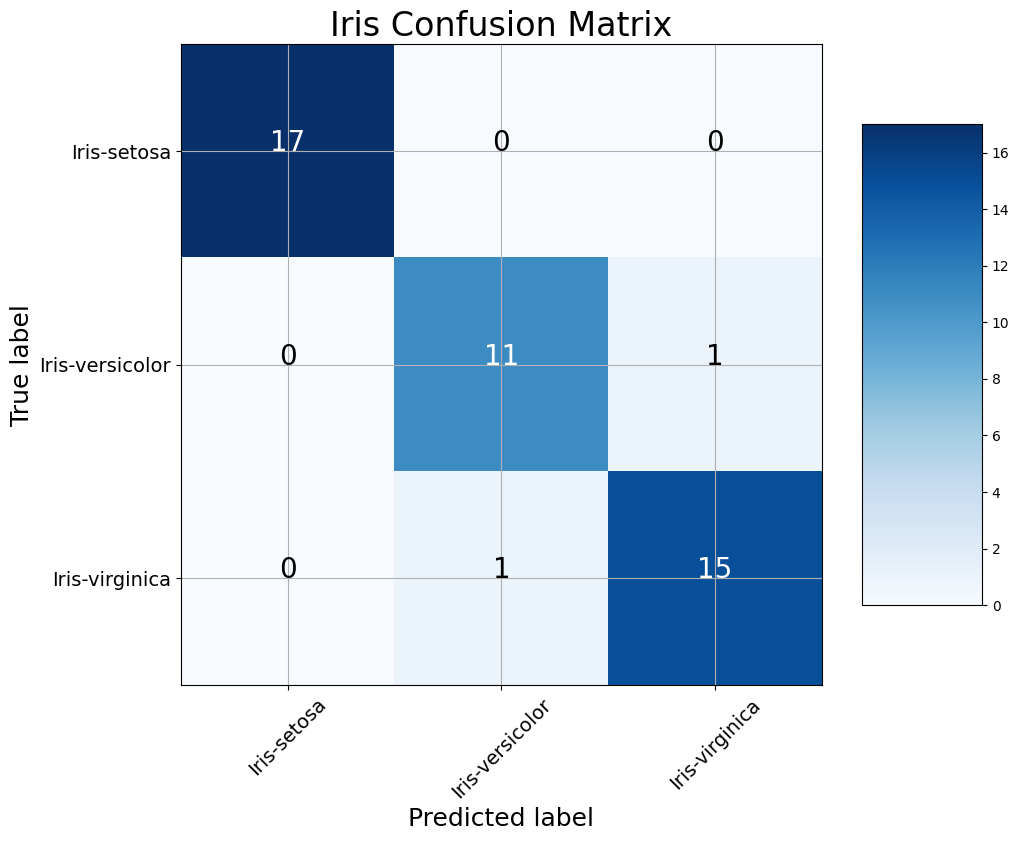

In [53]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], title = 'Iris Confusion Matrix', fileName='distance_70_30')

In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.56%


## weights: distance | 60:40

### Spilt Train and test Data

In [55]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [79]:
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

unique, counts = np.unique(y_test, return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

{'Iris-setosa': np.int64(40), 'Iris-versicolor': np.int64(40), 'Iris-virginica': np.int64(40)}
{'Iris-setosa': np.int64(10), 'Iris-versicolor': np.int64(10), 'Iris-virginica': np.int64(10)}


((120, 4), (30, 4), (120,), (30,))

### Pre Process

In [57]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Train Model

In [58]:
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
classifier.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

### Classifier performance evaluation

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
comparison_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(tabulate(comparison_table, headers='keys', tablefmt='grid'))

+----+-----------------+-----------------+
|    | Actual          | Predicted       |
+====+=================+=================+
|  0 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  1 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  2 | Iris-versicolor | Iris-versicolor |
+----+-----------------+-----------------+
|  3 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  4 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  5 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  6 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  7 | Iris-setosa     | Iris-setosa     |
+----+-----------------+-----------------+
|  8 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
|  9 | Iris-virginica  | Iris-virginica  |
+----+-----------------+-----------------+
| 10 | Iris

### Evaluation

Confusion matrix, without normalization


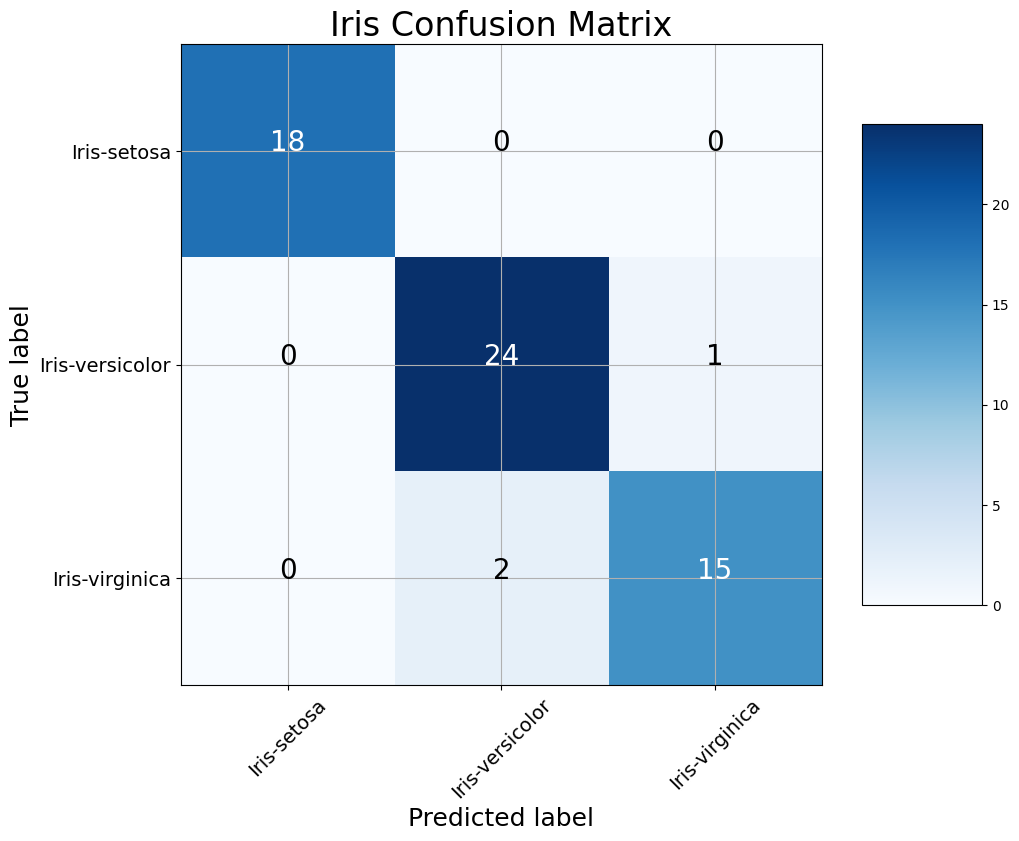

In [61]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], title = 'Iris Confusion Matrix', fileName='distance_60_40')

In [62]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.00%


# Error Rate

In [63]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

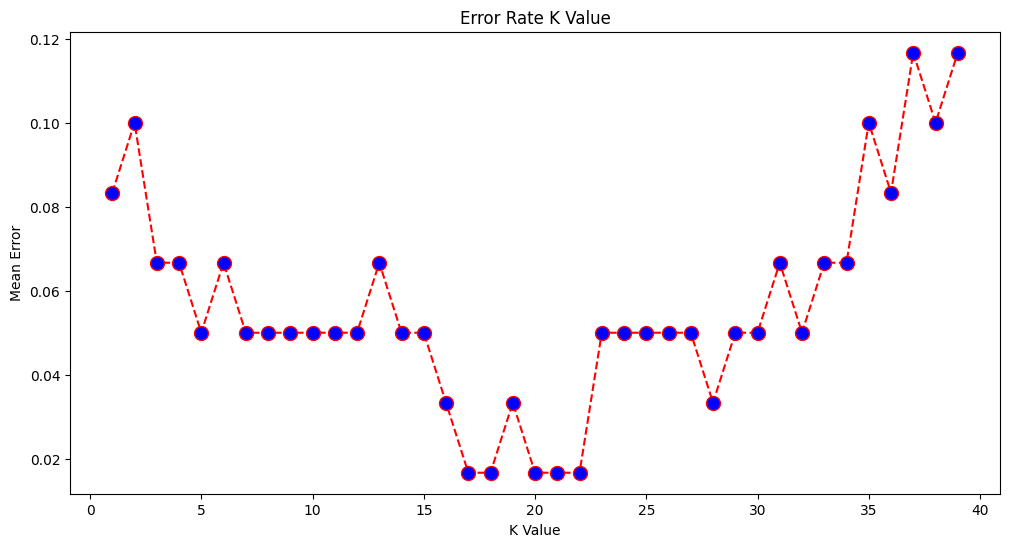

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')